# Probability for Data Analysis
When working with data, we often ask: **what values will variables assume?**

In some cases, we can predict these values with perfect accuracy—like solving a system of equations that describes the speed of an object using Newtonian physics. These are **deterministic systems**, where outcomes follow directly from initial conditions.

But in many real-world scenarios, we face **uncertainty**. Modeling the relationship between variables in a deterministic way is not always possible. This uncertainty can arise from several sources:

- **Inherent randomness**: Some events are truly stochastic, like rolling a die or drawing a card. Even with perfect knowledge, the outcome is unpredictable.
- **Incomplete observability**: Sometimes we can't see everything. In the Monty Hall problem, the game is deterministic, but the player lacks full information—so the outcome feels uncertain.
- **Incomplete modeling**: Even in deterministic systems, we may lack the tools to model them fully. For example, a robot with only an RGB camera may estimate object positions in 2D, but cannot reconstruct full 3D coordinates. The missing dimensions introduce uncertainty.

### Real-World Examples

- **Tossing a coin or rolling a die**: These are often treated as random events, even if they could be modeled deterministically in theory. The complexity of initial conditions makes prediction intractable.
- **Diagnosing a medical condition**: Different pathologies may share symptoms. Even with detailed observations, we may not be able to determine the exact diagnosis with certainty.

## Why Probability Theory Matters

Probability theory provides a **consistent framework** for reasoning about uncertainty. It allows us to:

- Quantify uncertain events
- Combine known and unknown information
- Derive new probabilistic statements using formal rules

In data analysis, probability is essential for:

- Modeling randomness and variability
- Making predictions under uncertainty
- Interpreting patterns and relationships in data

In this lecture, we’ll revisit the core concepts of probability theory—starting with random variables—and apply them to real datasets like the Titanic. We'll use tools like the **sum rule**, **product rule**, and **Bayes’ theorem** to answer questions such as:

- What is the probability that a passenger survived?
- What is the probability that a passenger was in 1st class, given that they survived?
- What is the probability that a passenger was in 3rd class, given that they died?

These examples will help us connect abstract probability rules to concrete data-driven reasoning.

### Random Experiments

In practice, when data acquisition is affected by uncertainty, we refer to the process as a **random experiment**. Informally, we define a random experiment as:

> An experiment that can be repeated any number of times, potentially leading to different outcomes.

We introduce the following terminology:

- **Sample space**  $\Omega = \{\omega_1, \ldots, \omega_k\}$  The set of all possible outcomes of the experiment.
- **Simple event** $\omega_i$: a single possible outcome.
- **Event** $A \subseteq \Omega$: a subset of the sample space representing a condition or outcome of interest. We usually denote  $\overline{A} = \Omega \setminus A$  as the complementary event to $A$, i.e., the event that $A$ does not occur.

By definition:
- The sample space $\Omega$ is called the **sure event** or **certain event**, since it includes all possible outcomes.
- The empty set $\emptyset$ is called the **impossible event**, as it contains no outcomes.


#### Example: Rolling a Die

Consider the random experiment of rolling a fair six-sided die. The outcome is the number shown on the top face when the die lands.

- **Sample space**: $\Omega = \{1, 2, 3, 4, 5, 6\}$
- **Simple event**: $\omega_1 = 1$ represents the outcome “we roll a 1”.
- **Event examples**:  
  - “We obtain a 1”:  $A = \{1\}$  
  - “We obtain an even number”:  $A = \{2, 4, 6\}$  
  - Complement of the above:  $\overline{A} = \{1, 3, 5\}$  Represents “we obtain an odd number”.

This framework allows us to describe uncertainty in a structured way, preparing us to assign probabilities to events and reason about their likelihood.

## Random Variables

We have so far talked about "statistical variables". When
dealing with uncertain events, we need to use the concept of 'random
variables'. Informally (from wikipedia):

> A random variable is a variable whose values depend on outcomes of a random phenomenon.

A random variable is characterized by a set of possible values often
called *sample space*, *probability space*, or *alphabet* (this last term comes from
information theory, where we often deal with sources emitting symbols
from an alphabet, in which case the values of $X$ will be the symbols).

The definition of a random variable is very similar to that of a statistical variable. Formally, if $\Omega$ is the *sample space*, we will define a random variable as a function:

$$ X : \Omega \to E $$

Where **E is a measurable space** and often $E=\mathbb{R}$. This definition is similar to the one of statistical variable we have given before.

A random variable is generally denoted by a *capital letter*, such as
$X$.

Similar to statistical variables, random variables can be *discrete* or *continuous*, *scalar* or *multi-dimensional*.

The following table lists some examples.

||**Discrete**|**Continuous**|
|-|-|-|
|**Scalar**             | Tossing a coin         | Height of a person|
|**Multidimensional**   | Pair of dice           | Coordinates of a car|

### Toy Titanic Example
![](..//_static/lecture_specific/probability/titanic.png)

We will now consider a toy example derived inspired to the Titanic dataset.

In this example, we will assume to have a very small ship with passengers in three classes and belonging to two possible genders (male or female).

To reason in terms of probability, we have to think of a random experiment first. To this aim, let's imagine the process of randomly picking a passenger from the list. This passenger will belong to one of the three classes and one of the two sexes. We will see how to use probability theory to answer different questions such as:

- Is it more likely to pick a woman or a man?
- If I pick a person from first class, is it more likely to pick a woman or a man?
- If I know I picked a woman, is it more likely that I am picking from first, second or third class?

As you can see, answering these questions allows us to better understand and characterize the data, but can also be useful for practical applications. For instance, we may deliver different services to the different classes depending on the people who populate the classes.

More technically, we will consider the experiment of randomly drawing a passenger from one of
the three classes. This happens in two stages:

-   We first randomly pick one of the three classes;

-   Then we randomly pick one of the passengers in the class;

-   After observing the sex of the passenger, we replace them in the same
    class.

The outcome of the experiment can be characterized by *two random
variables*:

-   C represents the class, which can take values $1, 2, 3$

-   S represents the sex of the passenger, which can take values $male$ and $female$


If we pick a male passenger marble from the third class, then the outcome of the experiment can be characterized by the values $C = 3$, $S = male$;

## Working Definition of Data

We will define "data" as follows:

> The values assumed by a random variable

### Example

-   For instance, if the sex of a passenger is $male$, then
    $S = male$ *is data*;

-   It should be clear that the 'data' is *the pair* \<random variable,
    value\> and not just the value. Indeed $male$ alone would not be
    very useful (we don't know which phenomenon it is related to),
    whereas $S = male$ can be useful, as we know that $S$ is the random
    variable describing the sex of the passenger;

-   In this example, the data $S = male$ is representing a fact: 'I
    randomly picked a passenger and their sex was $male$'. This is also called 'an
    event';

## Probability

Since random variables are related to stochastic phenomena, we cannot
say much about the outcome of a single phenomenon.

However, we expect to be able to characterize the class of experiments
related to a random variable, to infer rules on what values the random
variable is likely to take.

For instance, in the case of coin tossing, we can observe that, if I
toss a coin for a large number of times, the number of heads will be
roughly similar to the number of tails.

This kind of observations is useful, as it can give us a prior on what
values we are likely to encounter and what are not.

To formally express such rules, we can define the concept of probability
on a random variable.

Specifically, it is possible to assign a probability value to a given
outcome. This is generally represented with a capital P:

-   For instance, $P(C = 1)$ represents the probability of picking a
    from the first class in the previous example;

-   A probability $P(C = 1)$ is a number comprised between 0 and 1 which
    quantifies how likely we believe the event to be;
    -   0 means impossible;
    -   1 means certain;

When it is clear from the context which variable we are referring to,
the probability can also be expressed simply as:

$$P(male) = P(S = male)$$

### Probability Axioms
Kolmogorov in 1933 provided three axioms which define the "main rules" that probability should follow:

**Axiom 1**
Any event has a probability in the range $[0,1]$:

$$0 \leq P(A) \leq 1, \forall A\subseteq \Omega$$

**Axiom 2**
The certain event has probability 1:

$$P(\Omega) = 1$$

**Axiom 3**
If $A$ and $B$ are disjoint event (i.e., $A \cap B = \emptyset$), then:

$$P(A \cup B) = P(A) + P(B)$$

From these axioms, the following corollaries follow:

**Complement rule**
  
$$P(\overline{A}) = 1 - P(A)$$

**Probability of the impossible event**

$$P(\emptyset) = P(\overline{\Omega}) = 1 - P(\Omega) = 0$$

**General addition rule (for any events $A$ and $B$)**

$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$

**Monotonicity (if $A \subseteq B$)**

$$A \subseteq B \Rightarrow P(A) \leq P(B)$$

### Laplace Probability
**When all outcomes in a random experiment are considered equally probable**, this is called a **Laplace experiment**. In this case, we can calculate the probability of a given event $A$ as the ratio between the favorable outcomes and the possible outcomes:

$$P(A) = \frac{|A|}{|\Omega|} = \frac{\text{number of favorable outcomes}}{\text{number of possible outcomes}}$$

For instance, if we are tossing a die:
* The probability of obtaining any of the faces will be: $\frac{1}{6}$;
* The probability of obtaining an even number will be: $\frac{|\{2,4,6\}|}{|\{1,2,3,4,5,6\}|} = \frac{3}{6} = \frac{1}{2}$.

### Estimating probabilities from observations

What about the cases in which we cannot make any assumption on the equal probability of events? In those cases we would like to estimate probabilities from observations. There are two main approaches to do so: frequentist and Bayesian.

#### Frequentist approach

Probability theory was initially developed to analyze the frequency of
events. For instance, it can be used to study events like drawing a
certain hand of cards in a poker game. These events are repeatable and
can be dealt with using frequencies. In this sense, when we say that an
event has probability $p$ of occurring, it means that if we repeat the
experiment infinitely many times, then a proportion $p$ of the
repetitions would result in that outcome.

According to the frequentist approach, we can estimate probabilities by
repeating an experiment for a large number of times and then computing:

-   The number of trials: how many times we performed the experiment;

-   The number of favorable outcomes: how many times the outcome of the
    experiment was favorable.

The probability is hence obtained by dividing the number of favorable
outcomes by the number of trials. 

For instance, let's suppose we want to estimate the probability of
obtaining a 'head' by tossing a coin. Let's suppose we toss the coin
1000 times and obtain 499 heads and 501 tails. We can compute the
probability of obtaining head as follows:

-   Number of trials: 1000;

-   Number of favorable outcomes: 499.

The probability of obtaining head will be 499/1000=0.49

This is the approach we have seen so far in the course when dealing with relative frequencies.

##### Examples

-   The probability of obtaining 'head' when tossing a coin is 0.5. We
    know that because, if we toss a coin for a large number of times,
    about half of the times, we will obtain 'head';

-   The probability of picking a red ball from a box with 40 red balls
    and 60 blue balls is 0.4. We know this because, if we repeat the
    experiment for a large number of times, we will observe that
    proportion.

#### Bayesian Approach
The Bayesian approach to probability offers a different perspective on probability theory. Unlike the frequentist approach, which focuses on analyzing the frequency of events based on observations, the **Bayesian approach allows us to incorporate prior knowledge and update our beliefs as new information becomes available**.

In Bayesian probability, we view **probability as a measure of uncertainty or belief**. When we assign a probability to an event, it reflects our **subjective degree of belief in the event's likelihood**. This approach is particularly useful when dealing with unique or one-time events where frequency-based analysis may not be applicable (e.g., "**what is the probability that the sun will extinguish in 5 billion years?**").

We will discuss better the Bayesian approach when we'll discuss Bayes theorem.

### Example of Probability

![](..//_static/lecture_specific/probability/titanic.png)

Let's consider the previous example of randomly picking passengers.

Suppose we repeat this experiment for $100$ times and observe that:
-   We pick the first class $24$ times;
-   We pick the second class $32$ times;
-   We pick the third class $44$ times;
-   Once we selected a urn, we are equally likely to select any of the
    passengers contained in it, but we know that sexes are not distributed evenly in the classes (see figure).

Using a frequentist approach, we can define the probabilities:
-   $P(C = 1) = \frac{24}{100}$
-   $P(C = 2) = \frac{32}{100}$
-   $P(C = 3) = \frac{44}{100}$

This is done by using the formula:
* $P(X = x) = \frac{\#\ of\ times\ X = x}{\#\ trials}$

### Computation of frequentist probability values
In frequentist terms, probabilities are the same as relative frequencies we have seen in the previous lectures. Let's see how to compute such probabilities on the real Titanic dataset:

In [5]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv',
                     index_col='PassengerId')
titanic['Pclass'].value_counts(normalize=True).sort_index()  # relative frequencies

Pclass
1    0.242424
2    0.206510
3    0.551066
Name: proportion, dtype: float64

We can also visualize them for more clarity:

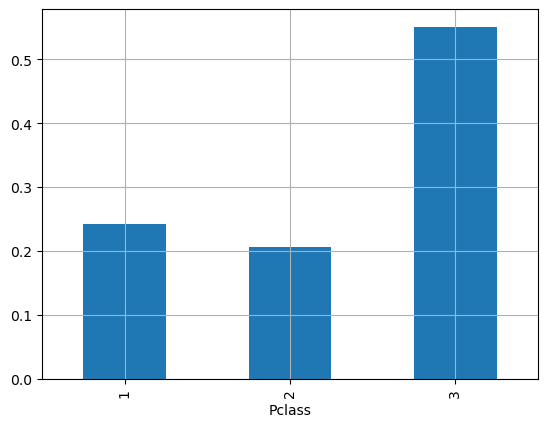

In [15]:
from matplotlib import pyplot as plt
titanic['Pclass'].value_counts(normalize=True).sort_index().plot.bar()  # relative frequencies
plt.grid()
plt.show()


## Joint probability

We can define **univariate** (= with respect to only one variable)
probabilities $P(C)$ as we have seen in the previous
examples.

However, in many cases, it is useful to define probabilities on more
than one variable at the time. For instance, we could be interested in
studying the probability of picking a given fruit from a given box. In
this case, we would be interested in the **joint probability** $P(C,S)$.

In general, we can have joint probabilities with arbitrary numbers of
variable. For instance,
$P\left( X_{1},X_{2},X_{3},\ldots,X_{n} \right)$.

Joint probabilities are symmetric, i.e., $P(X,Y) = P(Y,X)$.

We should note that, when dealing with multiple unidimensional
variables, we can always define a new multi-variate variable comprising
all of them:

-   $X = \left\lbrack X_{1},X_{2} \right\rbrack;$

-   $P(X) = P\left( X_{1},X_{2} \right)$.

### Example Joint Probability

![](..//_static/lecture_specific/probability/titanic.png)

We can see the concept of joint probability in the context of the
Titanic example.

We have seen how to define the univariate probability $P(C)$ over the
whole probability space of $C$.

However, we could be interested in the probability of both variables
jointly: $P(C,S)$, i.e., the joint probability of $C$ and $S$.

To 'measure' the joint probability, we could repeat the experiment
many times and observe the outcomes.

We can then build a table which keeps track of how many
times we observed a given combination:


|           | First Class | Second Class | Third Class | All |
|-          |-            |-             |-            |-    |
| male      | 3           | 5            | 7           | 15  |
| female    | 3           | 3            | 4           | 10  |
| All       | 6           | 8            | 11          | 25  |


A table like this is called a "**contincency table**".

From the table above, we can easily derive the joint probability of a
given pair of values using the **frequentist approach**. For instance:

$$P(C = 1,S = male) = \frac{\#\ times\ (1,male)\ occurs}{\#\ trials} = \frac{3}{25}$$

Similarly, we can derive other values:

-   $P(C = 1,S = female) = \frac{3}{25}$
-   $P(C = 2,S = male) = \frac{5}{25}$
-   $P(C = 2,S = female) = \frac{3}{25}$
-   $P(C = 3,S = male) = \frac{7}{25}$
-   $P(C = 3,S = female) = \frac{4}{25}$

Note that we can also obtain the univariate probabilities by using the
values in the "sum" row and column. For instance:

$$P(C = 1) = \frac{\#\ times\ C=1\ occurred}{\#\ trials} = \frac{3 + 3}{25} = \frac{6}{25}$$

Similarly:

-   $P(S = male) = \frac{15}{25}$

-   $P(S = female) = \frac{10}{25}$

-   $P(C = 2) = \frac{8}{25}$

-   $P(C = 3) = \frac{11}{25}$

These univariate probabilities computed starting from joint
probabilities are usually called **marginal probabilities**, because we are using
the sums in the margin of the table.

We can obtain a joint probability table by dividing the table by the total number of trials (25):

  
|           | First Class | Second Class | Third Class | All |
|-          |-            |-             |-            |-    |
| male      | 3/25           | 5/25            | 7/25           | 15/25  |
| female    | 3/25           | 3/25            | 4/25           | 10/25  |
| All       | 6/25           | 8/25            | 11/25          | 25/25  |

Alternatively, with decimal values:

|           | First Class | Second Class | Third Class | All |
|-          |-            |-             |-            |-    |
| male      | 0.12           | 0.2            | 0.28           | 0.6  |
| female    | 0.12           | 0.12            | 0.16           | 0.8  |
| All       | 0.24           | 0.32             | 0.44          | 1  |


#### Computation of a Joint Probability Table

To compute a joint probability table from data, we should first compute a contingency table, which is also called a crosstab in Pandas:

In [16]:
pd.crosstab(titanic['Sex'], titanic['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


The table above indicates, for example, that $94$ passengers in class $1$ were female. By specifying `margins=True`, we can obtain row and column sums, which will indicate the absolute frequencies of each variable:

In [17]:
pd.crosstab(titanic['Sex'], titanic['Pclass'],margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


We can obtain the joint relative frequency table by passing `normalize=True` to the crosstab function:

In [20]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=True, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.105499,0.085297,0.161616,0.352413
male,0.136925,0.121212,0.389450,0.647587
All,0.242424,0.206510,0.551066,1.000000


It should be noted that the marginal relative frequencies obtained are identical to the relative frequencies of the univariate samples:

In [21]:
titanic['Sex'].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

That are exactly the values in the last column of the previous table. Similarly, the univariate probabilities of Pclass are the same as the last row of the previous table:

In [23]:
titanic['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

#### Graphical representations

We can use contingency tables and joint probability tables to obtain graphical representations. For example:

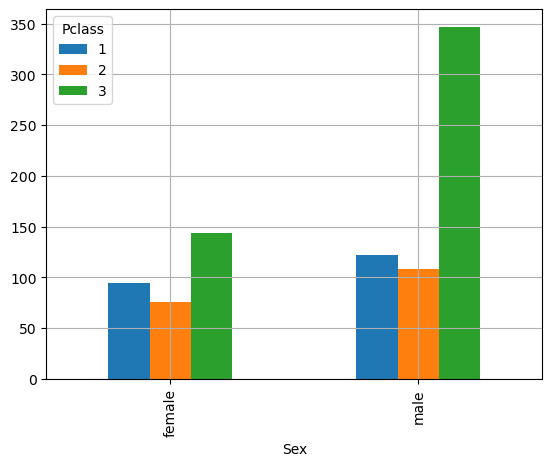

In [30]:
pd.crosstab(titanic['Sex'], titanic['Pclass']).plot.bar()
plt.grid()
plt.show()

The diagram above shows the distributions of people in the two classes, grouped by the two different sexes.

From this, we note that many passengers are men and in third class. In these cases, a stacked plot can sometimes be useful:

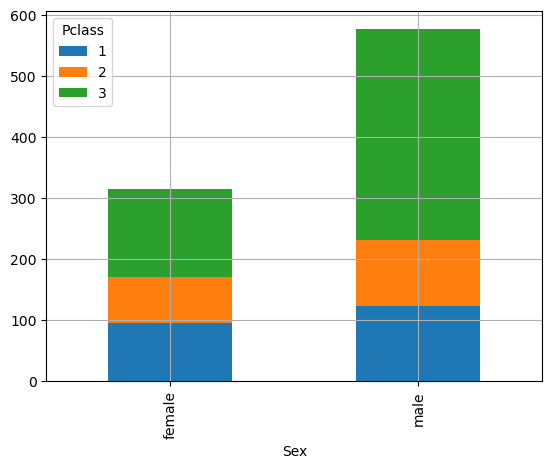

In [34]:
pd.crosstab(titanic['Sex'], titanic['Pclass']).plot.bar(stacked=True)
plt.grid()
plt.show()

We can reason in terms of joint probabilities by normalizing the counts:

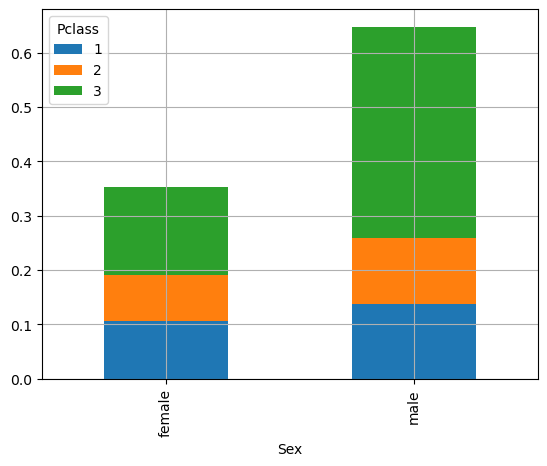

In [35]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=True).plot.bar(stacked=True)
plt.grid()
plt.show()

## Sum Rule (Marginal Probability)

In the previous example, we have seen how we can compute **marginal
(univariate) probabilities** from the contingency table. This is
possible because the contingency table contains information on how the
different possible outcomes distribute over the sample space.

In general, we can compute marginal probabilities form joint
probabilities (i.e., we don't need to have the non-normalized frequency
counts of the contingency table). Let us consider the general contingency table:

|             | Y=$y_1$        | Y=$y_2$ | ... | Y=$y_l$ | Total   |
|-------------|------------|------------|---------|-|-|
| X=$x_1$     | $n_{11}$  | $n_{12}$  | ... | $n_{1l}$ | $n_{1+}$ |
| X=$x_2$     | $n_{21}$  | $n_{22}$  | ... | $n_{2l}$ | $n_{2+}$ |
| ...     | ... | ... | ... | ...| ...| ...|
| X=$x_k$     | $n_{k1}$  | $n_{k2}$  | ... | $n_{kl}$ | $n_{k+}$ |
| Total       | $n_{+1}$  | $n_{+2}$ | ... |  $n_{+l}$  | $n$ |

where:
 - $n_{ij}$ is the number of times that we observe $X=x_i$ and $Y=y_j$ simultaneously (e.g., $C=1$ and $S=male$);
 - $n_{i+}$ is the sum of all occurrences in which $X = x_{i}$ (i.e., we are summing all values in row $i$): $n_{i+} = \sum_{j} n_{ij}$;
 - $n_{+j}$ is the sum of all occurrences in which $Y = y_{j}$ (i.e., we are summing all values in column $j$): $n_{+j} = \sum_{i} n_{ij}$;

We can compute the joint probability $P(X = x_{i},Y = y_{j})$ with a
frequentist approach using the formula:

$$P\left( X = x_{i},\ Y = y_{j} \right) = \frac{n_{ij}}{n}$$

We note that we can define the marginal probabilities of X and Y
as follows:

-   $P\left( X = x_{i} \right) = \frac{n_{i+}}{n}$.
-   $P\left( Y = y_{j} \right) = \frac{n_{+j}}{n}$.

We can hence write the marginal probability of $X$ as follows:

$$P\left( X = x_{i} \right) = \frac{n_{i+}}{n} = \frac{\sum_{j}n_{ij}}{n} = \sum_{j}\frac{n_{ij}}{n} = \sum_{j}^{}{P(X = x_{i},Y = y_{j})}$$

This result is known as the **sum rule of probability**, which allows to
estimate marginal probabilities from joint probabilities. This can be
seen in more general terms as:

$$P(X = x) = \sum_{y}^{}{P(X = x,Y = y)}$$

The act of computing $P(X)$ from $P(X,Y)$ is also known as
marginalization.

## Conditional Probability and Product Rule

**In many cases, we are interested in the probability of some event,
given that some other event happened.**

This is called **conditional** **probability** and is denoted as 

$$P(X=x|Y=y)$$

and read as 

> P of X=x given that Y=y

In this context, $Y = y$ is the condition, and we are
interested in studying the probability of X only in the cases in which
the condition is verified.

For instance, in our toy Titanic, we could be interested in
$P(S = male|C = 1)$, i.e., what is the probability of picking a male,
given that we know that we are drawing from the first class?

Let's consider our example contingency table of two variables again:

|             | Y=$y_1$        | Y=$y_2$ | ... | Y=$y_l$ | Total   |
|-------------|------------|------------|---------|-|-|
| X=$x_1$     | $n_{11}$  | $n_{12}$  | ... | $n_{1l}$ | $n_{1+}$ |
| X=$x_2$     | $n_{21}$  | $n_{22}$  | ... | $n_{2l}$ | $n_{2+}$ |
| ...     | ... | ... | ... | ...| ...| ...|
| X=$x_k$     | $n_{k1}$  | $n_{k2}$  | ... | $n_{kl}$ | $n_{k+}$ |
| Total       | $n_{+1}$  | $n_{+2}$ | ... |  $n_{+l}$  | $n$ |

We can compute the conditional probability
$P(X = x_{i}|Y = y_{j})$ using the frequentist approach:

$$P\left( X = x_{i} \middle| Y = y_{j} \right) = \frac{\#\ cases\ in\ which\ X = x_{i}\ and\ Y = y_{i}}{\#\ cases\ in\ which\ Y = y_{j}} = \frac{n_{ij}}{n_{+j}}$$

If we multiply the expression above by $1 = \frac{n}{n}$, we obtain:

$$P\left( X = x_{i} \middle| Y = y_{j} \right) = \frac{n_{ij}}{n}\frac{n}{n_{+j}} = \frac{\frac{n_{ij}}{n}}{\frac{n_{+j}}{n}} = \frac{P\left( X = x_{i},Y = y_{j} \right)}{P(Y = y_{j})}$$

This leads us to the general definition of conditional probability:

$$P\left( X = x \middle| Y = y \right) = \frac{P(X = x,\ Y = y)}{P(Y = y)}$$

The conditional probability is defined only when $P(Y = y) > 0$, that
is, we cannot define a probability conditioned on an event that never
happens. It should be noted that, in general
$P\left( X \middle| Y \right) \neq P(X)$.

### Product Rule (Factorization)

We can see the definition of conditional probability:

$$P\left( X = x \middle| Y = y \right) = \frac{P(X = x,\ Y = y)}{P(Y = y)}$$

As follows:

$$P(X = x,Y = y) = P\left( X = x \middle| Y = y \right)P(Y = y)$$

which is often referred to as **the product rule**.

*The product rule allows to compute joint probabilities starting from
conditional probabilities and marginal probabilities.* This is useful
because measuring joint probabilities generally involves creating large
tables, whereas conditional and marginal probabilities might be easier
to derive.

This operation of expressing a joint probability in terms of two factors
is known as *factorization*.



### How to compute a conditional probability?

We just said that factorization can be useful for computing joint
probabilities starting from conditional probabilities. However, two
questions arise: 
- How can we compute a conditional probability?
- Is it easier than computing a joint probability?

Since conditional probabilities are obtained by *restricting* the
probability space to *a subset* of the events, we can compute
conditional probabilities by considering the observations which satisfy
the condition.

For example, let's say we want to compute the conditional probability:

$$P(S|C = 1)$$

That is to say, the probability of picking a person of a given sex, given
that we know that we are considering the first class. Let's consider again our contingency table:

|           | First Class | Second Class | Third Class | All |
|-          |-            |-             |-            |-    |
| male      | 3           | 5            | 7           | 15  |
| female    | 3           | 3            | 4           | 10  |
| All       | 6           | 8            | 11          | 25  |

To compute this probability, we can just *consider all the observations
that satisfy the condition* $C = 1$, which is equivalent to taking the
first column of the full contingency table and compute the
probabilities in a frequentist way:

| | First Class |
|-|-|
|male |  3 | 
|female | 3 | 
|All | 6 |

$$ P(S=male|C=1) = \frac{3}{6} $$
$$ P(S=female|C=1) = \frac{3}{6} $$

Note that, in general, when the number of variables is large, this
approach allows to save a lot of space and time as it is not necessary
to even build the first contingency table, but only the second,
restricted one is required (for instance, one may choose not to record
all observations in which we where picking form the other classes).

Of course, the table above can be normalized to obtain a conditional probability table:

| | First Class |
|-|-|
|male |  0.5 | 
|female | 0.5 | 
|All | 1 |

In Python, it is possible to obtain the conditional relative frequencies by normalizing by the appropriate row. Rather than conditioning on class, let's condition on sex in this case. We can do so by normalizing by rows:

In [27]:
# normalize=0 indicates to condition on the first variable
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=0, margins=True)

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386
All,0.242424,0.206510,0.551066


From the table above, for example, we can infer:

* $f(Pclass=1|Sex=female) = 0.290363$
* $f(Pclass=2|Sex=female) = 0.242038$
* $f(Pclass=3|Sex=female) = 0.458599$

These are the frequencies of women in the three classes. Similarly, the second row represents the conditional frequencies with respect to `Sex=male`. From the table, we notice that the distribution of passengers changes across the three classes. In particular, among men, the third class is more frequent than among women.

We can obtain the complementary perspective by conditioning on class instead:

In [28]:
# normalize=1 indicates conditioning on the first variable
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=1, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.435185,0.413043,0.293279,0.352413
male,0.564815,0.586957,0.706721,0.647587


In this case, each column will be a probability distribution. For example:

* $P(Sex=female|Pclass=1) = 0.435185$
* $P(Sex=male|Pclass=1) = 0.564815$

We note that the proportion between men and women changes in the three classes, and in particular in the third class there are many more men than women.

### Graphical Representations
Similarly to joint probabilities, we can also obtain visualizations from conditional probabilities. For instance:

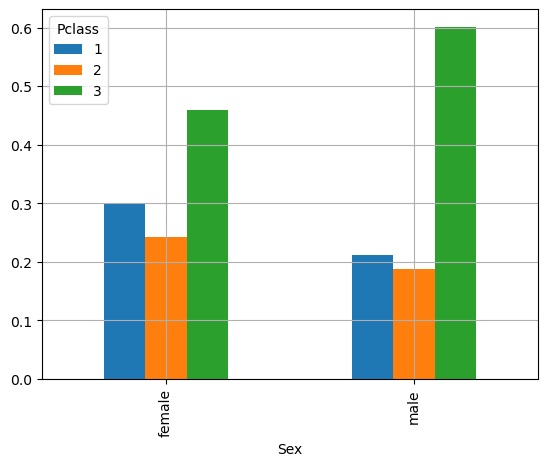

In [39]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=0).plot.bar()
plt.grid()
plt.show()

The diagram above shows the distributions of passengers in the three classes for the two sexes. Now, these are two valid probability distributions summing to one for all the three values (three classes). This is clearer with a stacked plot:

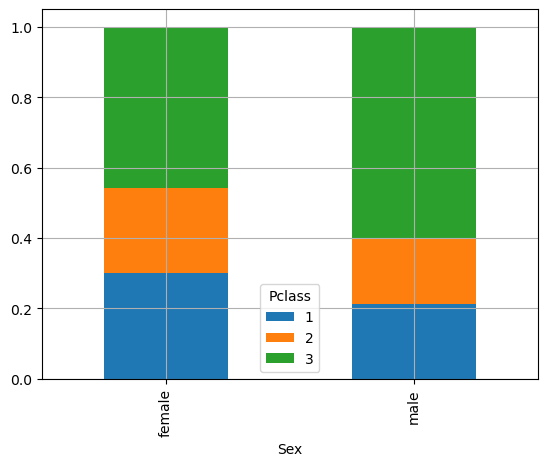

In [40]:
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=0).plot.bar(stacked=True)
plt.grid()
plt.show()

We can obtain the graph of conditional frequencies with respect to the classes for a complementary view. In this case, to have a meaningful graph, we need to transpose the contingency table with a `.T`:

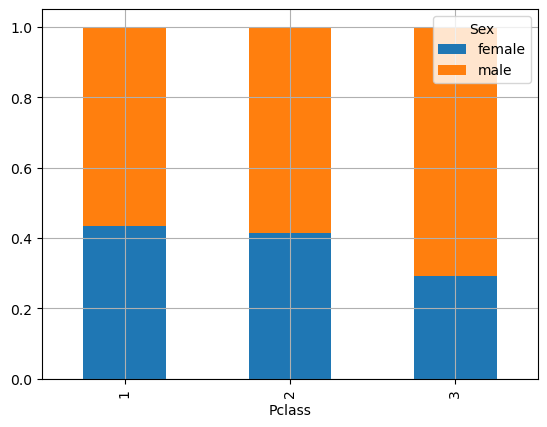

In [42]:
# normalize=1 indicates conditioning on the first variable
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize=1).T.plot.bar(stacked=True)
plt.grid()
plt.show()

This graph now shows the distribution of sexes in the three classes, clearly showing that class 3 contains mostly males.

## The Chain Rule of Conditional Probabilities

When dealing with multiple variables, the product rule can be applied in
an iterative fashion, thus obtaining the 'chain rule' of conditional
probabilities.

For instance:

$$P(X,Y,Z) = P\left( X \middle| Y,Z \right)P(Y,Z)$$

Since:

$$P(Y,Z) = P\left( Y \middle| Z \right)P(Z)$$

We obtain:

$$P(X,Y,Z) = P\left( X \middle| Y,Z \right)P\left( Y \middle| Z \right)P(Z)$$

Since joint probabilities are symmetric, we could equally obtain:

$$P(X,Y,Z) = P\left( Z \middle| Y,X \right)P\left( Y \middle| X \right)P(X)$$

This rule can be formalized as follows:

$$P\left( X_{1},\ldots,\ X_{n} \right) = P\left( X_{1} \right)\prod_{i = 2}^{n}{P(X_{i}|X_{1},\ldots,\ X_{i - 1})}$$



## Bayes' Theorem

Given two variables A and B, from the product rule, we obtain:

-   $P(A,B) = P\left( A \middle| B \right)P(B)$

-   $P(B,A) = P\left( B \middle| A \right)P(A)$

Since joint probabilities are symmetric, we have:

$$P(A,B) = P(B,A) \rightarrow P\left( A \middle| B \right)P(B) = P\left( B \middle| A \right)P(A)$$

Which implies:

$$P\left( A \middle| B \right) = \frac{P\left( B \middle| A \right)P(A)}{P(B)}$$

This last expression is known as Bayes' Theorem (or Bayes' rule).

Technically speaking, the Bayes' rule can be used to "turn"
probabilities of the kind $P(A|B)$ into probabilities of the kind
$P(B|A)$.

More formally, the Bayes' rule can be used to **update
our expectation that some event will happen (event A) when we observe
some evidence (event B)**. This links to the Bayesian interpretation of
probability, according to which probability can be seen as **a
*reasonable expectation* representing *the quantification of a degree of
belief*** (i.e., how much we believe some event will happen).

The different terms in the Bayes' rule have specific names:

-   $P(A)$ is called 'the prior' -- this is our expectation that A
    happens when we do not have any other data to rely on

-   $P(B|A)$ is called 'the likelihood' -- this quantifies how likely it
    is to observe event B happening if we assume that event A has
    happened

-   $P(B)$ is called 'the evidence' -- this models the probability of
    observing event B

-   $P(A|B)$ is called 'the posterior' -- this is our updated
    probability, i.e., how likely it is A to happen once we have
    observed B happening

We'll see an example in the section below.

### Bayesian Probability Example

Let's imagine we are trying to understand if a friend has COVID or not.
If we do not know anything about our friend's symptoms (i.e., we don't
know if they have any symptoms or not), then we would expect our friend
to have COVID with a "prior" probability $P(C)$. If we know that
currently one people over two has COVID, we expect:

$$P(C) = \frac{1}{2}$$

Now, if our friend tells us he has fever, things change a bit. We are
now interested in modeling the probability:
$P\left( C \middle| F \right)$. We can try to model it using Bayes'
rule:

$$P\left( C \middle| F \right) = \frac{P\left( F \middle| C \right)P(C)}{P(F)}$$

Note that it is not straightforward to estimate $P(C|F)$ in a
frequentist way. Ideally, we should take all people with a fever on
earth and check how many of them has COVID. This is not feasible as
people with just fever may never do a COVID test. On the contrary,
measuring $P(F|C)$ is easier: we take all people which we know have
COVID (these may not be all people with COVID, but probably a large
enough sample) and see how many of them have a fever. Let's suppose that
one people with COVID out of three has a fever. Then we can expect:

$$P\left( F \middle| C \right) = \frac{1}{3}$$

Now we need to estimate the evidence $P(F)$. This can be done by
considering how frequent it is for people to have a fever. Let's say we
use historical data and find out that one person out of five has fever.
We finally have:

$$P\left( C \middle| F \right) = \frac{\frac{1}{3}\frac{1}{2}}{\frac{1}{5}} = \frac{5}{6}$$

We can interpret this use of the Bayes' theorem as follows:

-   Before knowing anything about symptoms, we could only guess that our
    friend had COVID with a prior probability of $P(C) = \frac{1}{2}$

-   When we get to know that our friend has a fever, our expectation
    changes. We know that people with COVID often get a fever, but we
    also know that not all people with COVID get a fever, so we are not
    going to say that we are 100% certain that our friend has fever.
    Instead, we use Bayes' rule to obtain an updated estimate
    $P\left( C \middle| F \right) = \frac{5}{6}$ based on our knowledge
    of the likelihood $P(F|C)$ (how likely it is for people with symptom
    to have COVID) and the evidence $P(F)$ (how common is this symptom
    -- if it is too common, then it is not so informative)



## Independence and Conditional Independence

Two variables $X$ and $Y$ are independent if the outcome of one of the
two does not influence the outcome of the other. Formally speaking, two
variables are **said to be independent** if and only if:

$$P(X,Y) = P(X)P(Y)$$

It should be noted that the expression above **is generally not true**
as we cannot always assume that two variables are independent.

Independence can be denoted as:

$$X\bot Y$$

Moreover, if two variables $X$ and $Y$ are independent, then:

$$P\left( X \middle| Y \right) = \frac{P(X,Y)}{P(Y)} = \frac{P(X)P(Y)}{P(Y)} = P(X)$$

This makes sense because it means that "the fact that $Y$ happens does
not influence the fact that $X$ happens", which is what we would expect
of two independent variables $X$ and $Y$.

### Examples

Intuitively, two variables are independent if the values of one of them
do not affect the values of the other one:

-   Weight and height of a person are **not independent**. Indeed,
    taller people are usually heavier.

-   Height and richness are **independent**, as the richness does not
    depend on the height of a person.



### Conditional independence

Two random variables $X$ and $Y$ are said to be **conditionally
independent** given a random variable $Z$ if:

$$P\left( X,Y \middle| Z \right) = P\left( X \middle| Z \right)P\left( Y \middle| Z \right)$$

Conditional independence can be denoted as:

$$X\bot Y\ |\ Z$$

#### Example

Height and vocabulary are not independent: taller people are usually
older, and hence they have a more sophisticated vocabulary (they know
more words). However, if we condition on age, they become independent.
Indeed, among people of the same age, height should not influence
vocabulary. Hence, height and vocabulary are **conditionally
independent** with respect to age.



## Example of Probability Manipulation

Let's now consider a real probability manipulation example. This time we will consider the following variables: `Pclass` and `Survived`. We will use observed proportions to answer questions such as:

1. What is the overall probability that a passenger survived?
2. What is the probability that a passenger was in 1st class and they survived?
3. What is the probability that a passenger survived, given that they were in 3rd class?

We will start by defining two random variables:

- $ Pclass \in \{1, 2, 3\} $: Passenger class
- $ Survived \in \{0, 1\} $: Survival outcome (0 = died, 1 = survived)

### What is the overall probability that a passenger survived?
To answer this question, we need to compute the overall probabilites of surviving ($P(Survived)$):

In [45]:
titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

From the table above, we can say:
- $P(Survived=1) = 0.39$
- $P(Survived=0) = 0.61$



### What is the probability that a passenger was in 1st class and they survived?
To answer this question, we need to compute the joint probability:

In [48]:
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize=True, margins=True)

Pclass,1,2,3,All
Survived,,,,
0,0.089787,0.108866,0.417508,0.616162
1,0.152637,0.097643,0.133558,0.383838
All,0.242424,0.206510,0.551066,1.000000


From the table above, we can answer our question as follows:

$$P(Pclass=1, Survived=1) = 0.09$$

### What is the probability that a passenger survived, given that they were in 3rd class?

To answer this question, we need to compute a conditional distribution:

In [50]:
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize=1, margins=True)

Pclass,1,2,3,All
Survived,,,,
0,0.37037,0.527174,0.757637,0.616162
1,0.62963,0.472826,0.242363,0.383838


To answer the question, we can say:

$$P(Survived=1|Pclass=3) = 0.24$$

### Excercise

Suppose that we have three colored boxes r (red), b (blue), and g
(green). Box r contains 3 apples, 4 oranges, and 3 limes, box b contains
1 apple, 1 orange, and 0 limes, and box g contains 3 apples, 3 oranges,
and 4 limes. If a box is chosen at random with probabilities P(r)=0.2,
P(b)=0.2, P(g)=0.6, and a piece of fruit is extracted from the box (with
equal probability of selecting any of the items in the box), then what
is the probability of selecting an apple? If we observe that the
selected fruit is in fact an orange, what is the probability that it
came from the green box?



## References

-   Parts of chapter 1 of \[1\];
-   Most of chapter 3 of \[2\];
-   Parts of chapters 5-7 of \[3\].


\[1\] Bishop, Christopher M. *Pattern recognition and machine learning*.
springer, 2006.
<https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf>

\[2\] Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. *Deep
learning*. MIT press, 2016. <https://www.deeplearningbook.org/>

\[3\] Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.
